<a href="https://colab.research.google.com/github/Priya5MC/DataScienceMasterclass/blob/main/subscriber_deposit_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import zipfile as zp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
unz = zp.ZipFile('/content/Participants_Data_STPSHa.zip')
unz.extractall()

In [9]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')

In [14]:
train.shape
test.shape
submission.shape

(9000, 1)

In [15]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [18]:
data = pd.concat([train,test])

In [20]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool'],
      dtype='object')

In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0


In [23]:
cat_cols = data.select_dtypes(include=object).columns

In [25]:
num_cols = data.drop(columns='y_bool').select_dtypes(include=np.number).columns

In [26]:
display(cat_cols,num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [27]:
nrows=3
ncols=3
itr=1

In [28]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

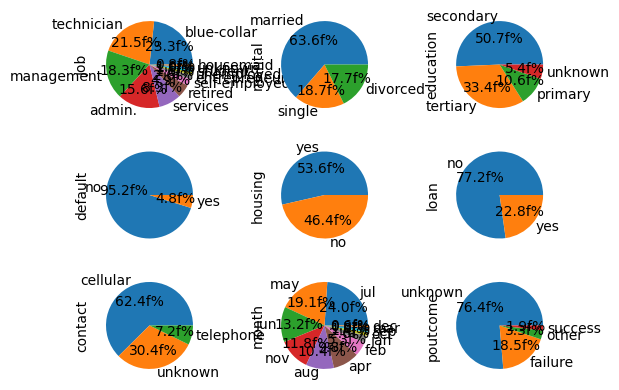

In [31]:
for i in cat_cols:
    plt.subplot(nrows,ncols,itr)
    a = data[i].value_counts().plot.pie(autopct = '%1.1ff%%')
    itr+=1
plt.show()

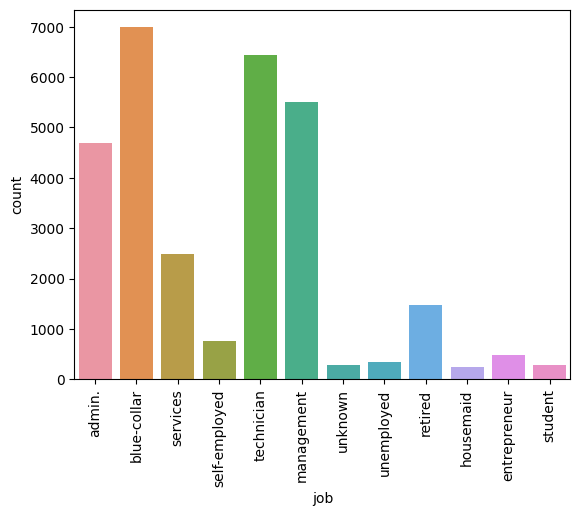

In [32]:
plot = sns.countplot(x='job',data=data)
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

y_bool,0.0,1.0
marital,,
divorced,2703,1010
married,9776,3636
single,2870,1005


ValueError: ignored

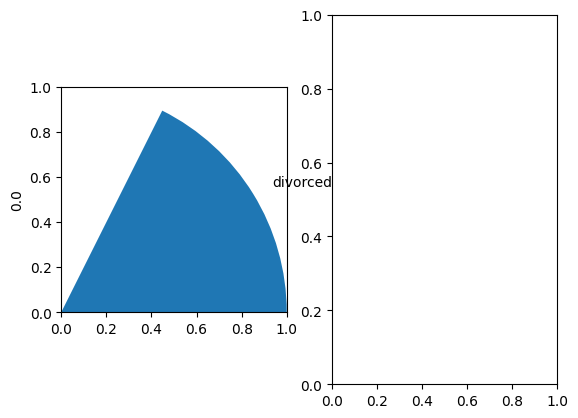

In [35]:
display(pd.crosstab(data['marital'],data['y_bool']))
pd.crosstab(data['marital'],data['y_bool']).plot.pie(autopct='%1.1%f%',subplots=True)

In [36]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y_bool       9000
dtype: int64

In [37]:
[print(i,data[i].nunique(),data[i].unique())
for i in data.columns if data[i].nunique()<10]

marital 3 ['married' 'divorced' 'single']
education 4 ['tertiary' 'secondary' 'primary' 'unknown']
default 2 ['no' 'yes']
housing 2 ['no' 'yes']
loan 2 ['no' 'yes']
contact 3 ['cellular' 'unknown' 'telephone']
poutcome 4 ['unknown' 'success' 'failure' 'other']
y_bool 2 [ 0.  1. nan]


[None, None, None, None, None, None, None, None]

In [38]:
display(cat_cols,num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')